In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt


In [60]:
data = pd.read_csv('Project/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


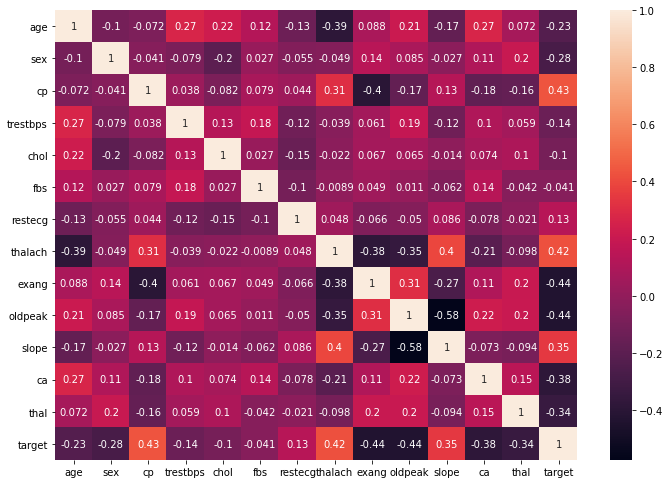

In [61]:
corr_matrix = data.corr()
plt.rcParams['figure.figsize'] = 11.7,8.27
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [62]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [63]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
data2 = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]})
collection = data2.sort_values(by='Importance', ascending=False)

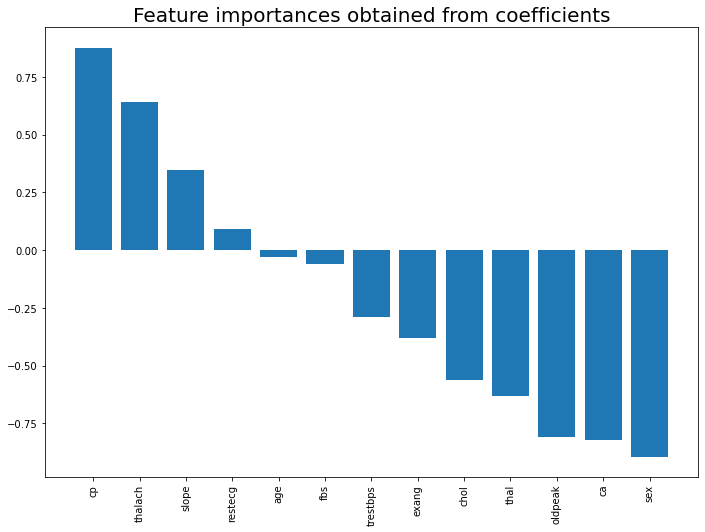

In [64]:
plt.bar(x=collection['Attribute'], height=collection['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

We first split data equally into training and testing sets. random_state=2 enforce we obtain same result everytime we run this code

In [65]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.20, random_state = 2)
#xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.50, random_state = 2)
#different spliting cause different accuracy

To perform knn algorithm, we use cross validation to find the best numbers of nearest neighbor to use.

In [66]:
n=[1,2,3,4,5,6,7,8,9,10]
score_lst=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    s=cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    score_lst.append(s.mean())
max_val=max(score_lst)
for i,v in enumerate(score_lst):
    if max_val==v:
        print(f"we choose n_neighbors parameter equal to {i+1}")

we choose n_neighbors parameter equal to 1


Thus we fit input n_neighbors=1 as our parameter and fit the training data.

In [67]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(xtrain, ytrain)
kpred = knn2.predict(xtest)
confusion = confusion_matrix(ytest, kpred)
kacc = accuracy_score(ytest, kpred)

In [68]:
lasso=LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(xtrain,ytrain)
lpred=lasso.predict(xtest)
confusion2 = confusion_matrix(ytest, lpred)
lacc = accuracy_score(ytest, lpred)


Below is the confusion matrix and we have accuracy of 73.78% to correctly predict patients with/without heart diease.

In [69]:
print(confusion)
print(kacc)

[[270 137]
 [ 78 335]]
0.7378048780487805


Below is the confusion matrix for logistic lasso and we have accuracy of 80.60% to correctly predict patients with/without heart diease.

In [70]:
print(confusion2)
print(lacc)

[[305 102]
 [ 57 356]]
0.8060975609756098


### Data after dropping non significant variables

In [71]:
data2=data.loc[:, data.columns.isin(['cp','thalach','oldpeak','ca','sex','target'])]
data2

,sex,cp,thalach,oldpeak,ca,target
0,1,0,168,1.0,2,0
1,1,0,155,3.1,0,0
2,1,0,125,2.6,0,0
3,1,0,161,0.0,1,0
4,0,0,106,1.9,3,0
...,...,...,...,...,...,...
1020,1,1,164,0.0,0,1
1021,1,0,141,2.8,1,0
1022,1,0,118,1.0,1,0
1023,0,0,159,0.0,0,1


In [72]:
xr = data2.iloc[:, :-1]
yr = data2.iloc[:, -1]
xtrainr,xtestr,ytrainr,ytestr = train_test_split(xr,yr,train_size=0.20, random_state = 2)
#xtrainr,xtestr,ytrainr,ytestr = train_test_split(xr,yr,train_size=0.50, random_state = 2)

In [73]:
knn_r = KNeighborsClassifier(n_neighbors=1)
knn_r.fit(xtrainr, ytrainr)
kpred_r = knn_r.predict(xtestr)
confusion_r = confusion_matrix(ytestr, kpred_r)
kacc_r = accuracy_score(ytestr, kpred_r)



After performing knn method on the reduced dataset we obtain the confusion matrix and its accuracy down below. As we can see, the reduced dataset gives us better prediction.

Below is the confusion matrix and we have accuracy of 79.75% to correctly predict patients with/without heart diease after droping.

In [74]:
print(confusion_r)
print(kacc_r)

[[310  97]
 [ 69 344]]
0.7975609756097561


In [75]:
lassor=LogisticRegression(penalty='l1', solver='liblinear')
lassor.fit(xtrainr,ytrainr)
lpredr=lassor.predict(xtestr)
confusion2_r = confusion_matrix(ytestr, lpredr)
laccr = accuracy_score(ytestr, lpredr)

Below is the confusion matrix for logistic lasso and we have accuracy of 80.60% to correctly predict patients with/without heart diease after droping.

In [76]:
print(confusion2_r)
print(laccr)

[[320  87]
 [ 60 353]]
0.8207317073170731
